In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


from dbn import SupervisedDBNClassification

In [2]:
digits = load_digits()
X, Y = digits.data, digits.target
X = (X / 16)
X = X.astype(np.float32)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
Y.shape

(1797,)

In [13]:
X[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ],
      dtype=float32)

In [16]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=10,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
history = classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.794956
>> Epoch 2 finished 	RBM Reconstruction error 1.838199
>> Epoch 3 finished 	RBM Reconstruction error 1.478933
>> Epoch 4 finished 	RBM Reconstruction error 1.267090
>> Epoch 5 finished 	RBM Reconstruction error 1.103811
>> Epoch 6 finished 	RBM Reconstruction error 1.001111
>> Epoch 7 finished 	RBM Reconstruction error 0.936655
>> Epoch 8 finished 	RBM Reconstruction error 0.935733
>> Epoch 9 finished 	RBM Reconstruction error 0.866084
>> Epoch 10 finished 	RBM Reconstruction error 0.806699
>> Epoch 1 finished 	RBM Reconstruction error 2.858534
>> Epoch 2 finished 	RBM Reconstruction error 1.515529
>> Epoch 3 finished 	RBM Reconstruction error 1.135121
>> Epoch 4 finished 	RBM Reconstruction error 0.906473
>> Epoch 5 finished 	RBM Reconstruction error 0.766554
>> Epoch 6 finished 	RBM Reconstruction error 0.670521
>> Epoch 7 finished 	RBM Reconstruction error 0.575204
>> Epoch 8 finished 	RBM Reconstructi

In [5]:
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

Done.
Accuracy: 0.944444


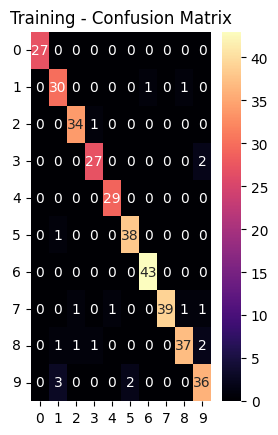

In [11]:
# Predict on testing (for verification)
Y_pred_test = classifier.predict(X_test)
CM_test = confusion_matrix(Y_pred_test, Y_test)
test_acc = accuracy_score(Y_test, Y_pred_test)

ax2 = plt.subplot(122)
ax2.set_title("Training - Confusion Matrix")
sns.heatmap(CM_test, annot=True, cmap="magma", ax=ax2, fmt='d')
plt.yticks(rotation=0)

plt.show()